In [1]:
from mesh import Mesh

In [2]:
v = []
for i in range(0,11):
  for j in range(0,11):
    if not (i >= 4 and i <= 6 and j == 5):
      v.append([i,j])

f = []
for i in range(0,10):
  for j in range(0,10):
    if not (i >= 3 and i <= 6 and j >= 4 and j <= 5):      
      f.append([[i,j], [i+1,j], [i+1,j+1], [i,j+1]])


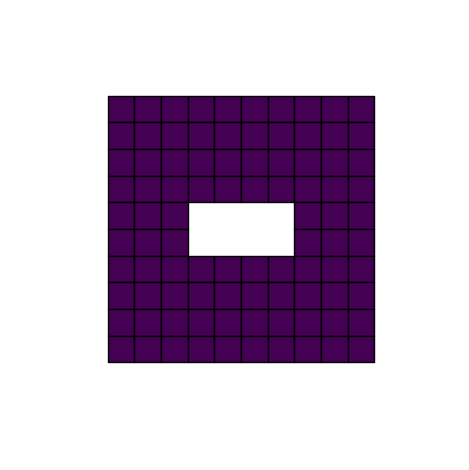

In [4]:
fi = Mesh.faces_points_to_index(v, f)
mesh = Mesh(v,fi,2)
mesh.visualize(max_x = 10, max_y = 10, show_axis=False)